# correlation 한번 보기 

acc_id 기준으로 agg해서, amount_spent와 correlation보기


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
path = 'drive/My Drive/bigcontest2019/data/'

In [0]:
train_label = pd.read_csv(path + 'train/train_label.csv').sort_values(['acc_id']).fillna(0)

In [0]:
# train
train_activity = pd.read_csv(path + 'train/train_activity.csv').sort_values(['acc_id','day']).fillna(0)
train_payment = pd.read_csv(path + 'train/train_payment.csv').sort_values(['acc_id','day']).fillna(0)
train_trade = pd.read_csv(path + 'train/train_trade.csv').fillna(0)
train_pledge = pd.read_csv(path + 'train/train_pledge.csv').sort_values(['acc_id','day']).fillna(0)
train_combat = pd.read_csv(path + 'train/train_combat.csv').sort_values(['acc_id','day']).fillna(0)

# # test1
# test1_activity = pd.read_csv(path + 'test/test1_activity.csv').sort_values(['acc_id','day']).fillna(0)
# test1_payment = pd.read_csv(path + 'test/test1_payment.csv').sort_values(['acc_id','day']).fillna(0)
# test1_trade = pd.read_csv(path + 'test/test1_trade.csv').fillna(0)
# test1_pledge = pd.read_csv(path + 'test/test1_pledge.csv').sort_values(['acc_id','day']).fillna(0)
# test1_combat = pd.read_csv(path + 'test/test1_combat.csv').sort_values(['acc_id','day']).fillna(0)

# # test2
# test2_activity = pd.read_csv(path + 'test/test2_activity.csv').sort_values(['acc_id','day']).fillna(0)
# test2_payment = pd.read_csv(path + 'test/test2_payment.csv').sort_values(['acc_id','day']).fillna(0)
# test2_trade = pd.read_csv(path + 'test/test2_trade.csv').fillna(0)
# test2_pledge = pd.read_csv(path + 'test/test2_pledge.csv').sort_values(['acc_id','day']).fillna(0)
# test2_combat = pd.read_csv(path + 'test/test2_combat.csv').sort_values(['acc_id','day']).fillna(0)

In [0]:
activity_server = pd.get_dummies(train_activity['server'] )

In [0]:
train_activity.drop('server',axis=1,inplace=True)
train_activity = pd.concat([train_activity,activity_server],axis=1)

act = train_activity.drop('char_id',axis=1).groupby('acc_id').nunique().reset_index()
activity_label = train_label.merge(act,on='acc_id',how='left')

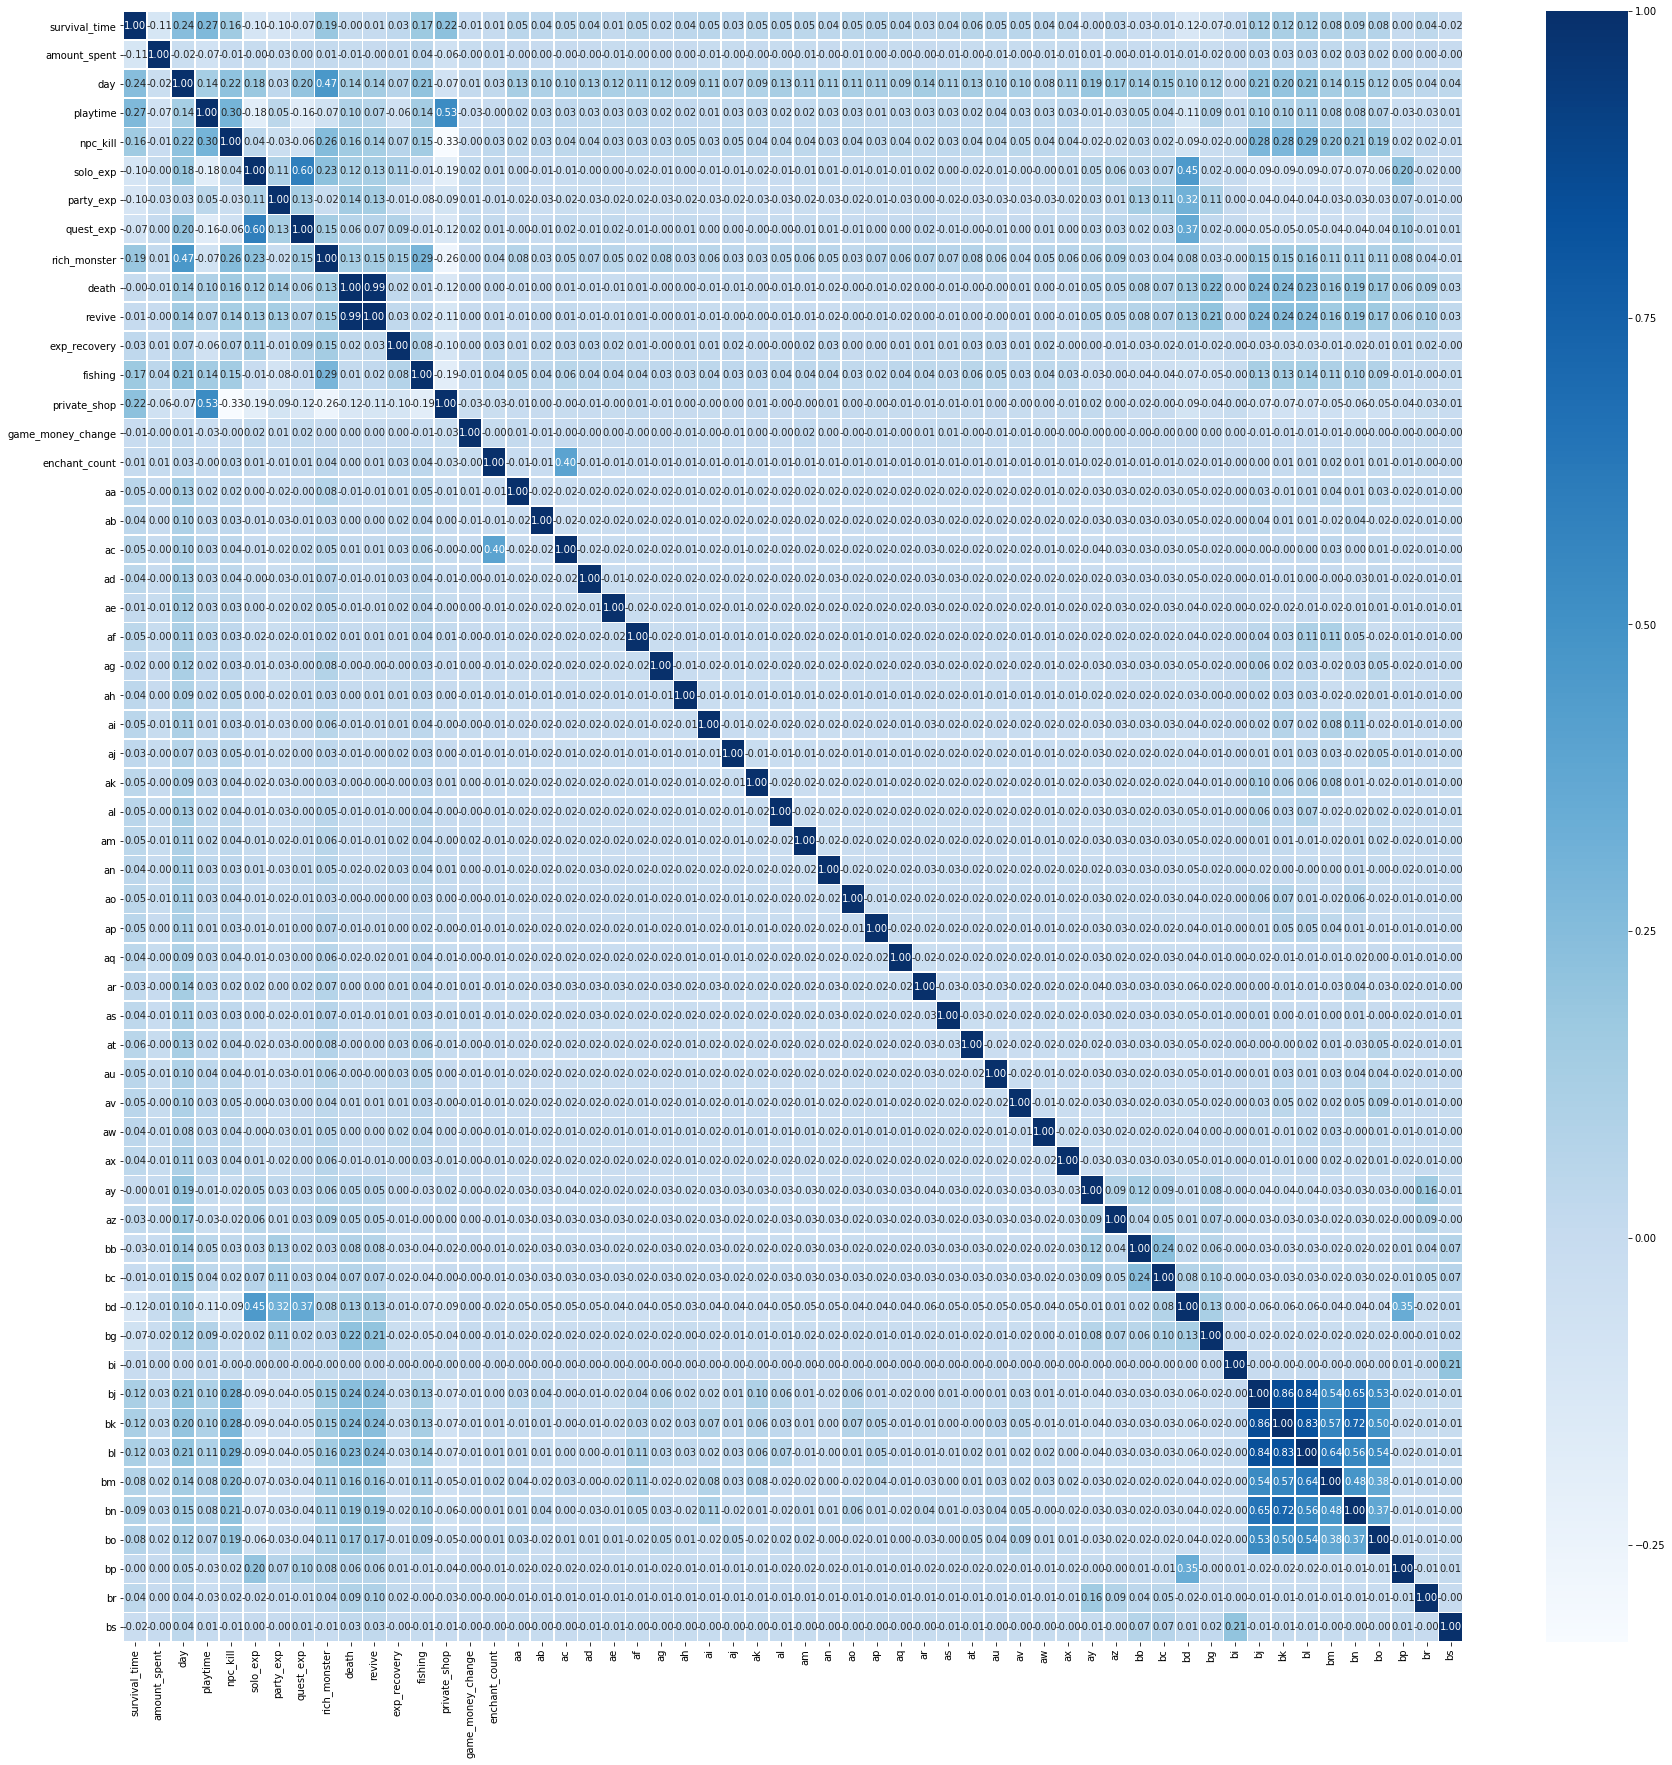

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sns.heatmap(data = activity_label.drop(['acc_id'], axis = 1).corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

# trade

In [0]:
trade_server = pd.get_dummies(train_trade['server'])
trade_item_type = pd.get_dummies(train_trade['item_type'])

In [0]:
# train_trade.drop(['server','item_type'],axis=1,inplace=True)
train_trade = pd.concat([train_trade,trade_server,trade_item_type],axis=1)

In [0]:
trade = train_trade.drop('char_id',axis=1).groupby('acc_id').count().reset_index()
trade_label = train_label.merge(trade,on='acc_id',how='left')

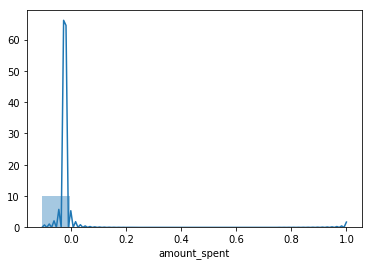

In [42]:
sns.distplot(trade_label.drop(['acc_id'], axis = 1).corr()['amount_spent'])

In [0]:
pledge_server = pd.get_dummies(train_pledge['server'])
pledge_pledge_id = pd.get_dummies(train_pledge['pledge_id'])

In [0]:
# train_pledge.drop(['server','pledge_id'],axis=1,inplace=True)
train_trade = pd.concat([train_trade,trade_server,pledge_pledge_id],axis=1)

In [0]:

combat_class = pd.get_dummies(train_combat['class'])
combat_level = pd.get_dummies(train_combat['level'])